#About Data

<p align="justify">Tentang Dataset
Dataset berisi informasi tentang pekerjaan, pendapatan bulanan, skor kredit, masa kerja, status keuangan, riwayat keuangan, jumlah anak, dan kepemilikan mobil
<br>
<br>
<b>Pekerjaan</b>: Kolom ini memberikan informasi tentang jenis pekerjaan yang digunakan setiap individu. Ini mencakup berbagai profesi, seperti posisi administratif, perdagangan terampil, pekerjaan industri jasa, dan banyak lagi. Kolom pekerjaan dapat berguna untuk memahami jenis pekerjaan yang dipegang oleh individu dengan berbagai tingkat pendapatan, skor kredit, dan karakteristik lainnya.
<br>
<br>
<b>Penghasilan Bulanan</b>: Kolom ini memberikan informasi tentang jumlah uang yang diperoleh setiap individu dalam sebulan. Pendapatan bulanan dapat digunakan untuk menentukan tingkat stabilitas keuangan setiap individu, serta untuk memahami hubungan antara pendapatan dan faktor lain, seperti skor kredit, masa kerja, dan jumlah anak.
<br>
<br>
<b>Skor Kredit</b>: Kolom ini memberikan informasi tentang skor kredit setiap individu, yang merupakan representasi numerik dari kelayakan kredit mereka. Skor kredit dapat berkisar dari 300 hingga 850, dengan skor yang lebih tinggi menunjukkan kelayakan kredit yang lebih baik. Kolom skor kredit dapat digunakan untuk mengetahui tingkat tanggung jawab keuangan masing-masing individu, serta untuk memahami hubungan antara skor kredit dengan faktor lain, seperti pendapatan bulanan dan riwayat keuangan.
<br>
<br>
<b>Tahun Kerja</b>: Kolom ini memberikan informasi tentang lamanya waktu setiap individu telah bekerja di pekerjaan mereka saat ini. Lama bekerja dapat digunakan untuk menentukan tingkat stabilitas dan keandalan setiap individu, serta untuk memahami hubungan antara riwayat pekerjaan dan faktor lain, seperti pendapatan bulanan dan skor kredit.
</p>

#https://www.kaggle.com/datasets/rkiattisak/car-ownership-predictionbeginner-intermediate

#Import library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('D:\Project\Car Ownership\Car-Ownership-Prediction\Dataset\Car Ownership.csv')
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           490 non-null    object 
 1   Monthly Income       487 non-null    object 
 2   Credit Score         460 non-null    float64
 3   Years of Employment  457 non-null    object 
 4   Finance Status       477 non-null    object 
 5   Finance History      472 non-null    object 
 6   Car                  480 non-null    object 
 7   Number of Children   375 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [10]:
# Summary statistics for numerical columns
print(df.describe())

       Credit Score
count    460.000000
mean     702.969565
std       69.232323
min      500.000000
25%      650.000000
50%      700.000000
75%      750.000000
max      900.000000


In [14]:
df.isna().sum()

Occupation              10
Monthly Income          13
Credit Score            40
Years of Employment     43
Finance Status          23
Finance History         28
Car                     20
Number of Children     125
dtype: int64

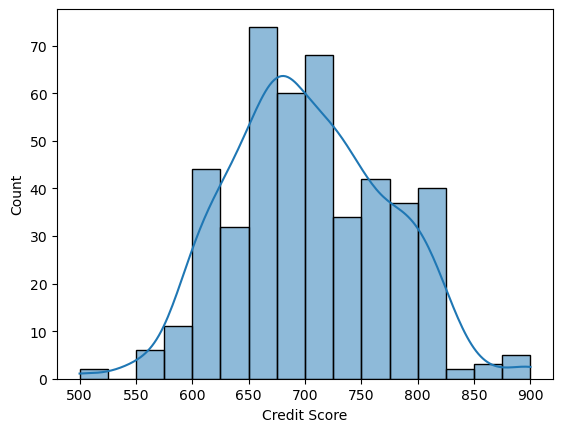

In [13]:
# Explore numerical columns
numerical_cols = ['Credit Score']
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.show()

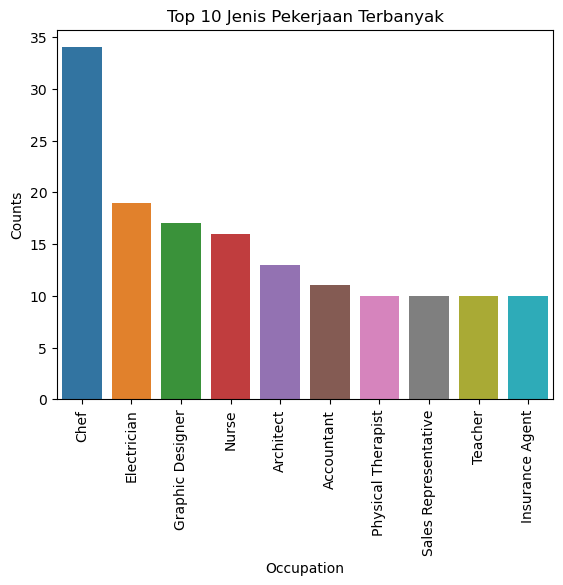

In [18]:
# Menampilkan 10 jenis pekerjaan terbanyak
occupation_counts = df['Occupation'].value_counts().nlargest(10)
# Visualisasi dengan bar plot
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Top 10 Jenis Pekerjaan Terbanyak')
plt.xticks(rotation=90)
plt.show()

In [19]:
print(occupation_counts)

Occupation
Chef                    34
Electrician             19
Graphic Designer        17
Nurse                   16
Architect               13
Accountant              11
Physical Therapist      10
Sales Representative    10
Teacher                 10
Insurance Agent         10
Name: count, dtype: int64


In [31]:
df['Finance Status'].value_counts()

Finance Status
Stable       235
Unstable      58
Good           9
Excellent      6
Fair           5
Unknow         1
Unkonw         1
Name: count, dtype: int64

In [27]:
df = df.dropna()
df.isna().sum()

Occupation             0
Monthly Income         0
Credit Score           0
Years of Employment    0
Finance Status         0
Finance History        0
Car                    0
Number of Children     0
dtype: int64

Finance History
No significant issues          239
Missed payments in the past     27
Late payments                   23
Late payments, collections      12
No issues                        8
Name: count, dtype: int64


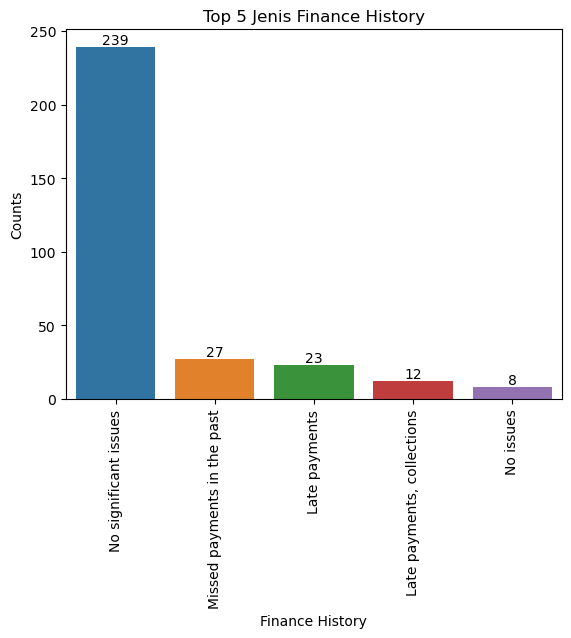

In [30]:
# Drop rows with NaN values in 'Finance History' column
df.dropna(subset=['Finance History'], inplace=True)

# Menampilkan 5 jenis Finance History terbanyak setelah data yang NaN dihapus
financestory_counts = df['Finance History'].value_counts().nlargest(5)
print(financestory_counts)

# Visualisasi dengan bar plot
sns.barplot(x=financestory_counts.index, y=financestory_counts.values)
plt.xlabel('Finance History')
plt.ylabel('Counts')
plt.title('Top 5 Jenis Finance History')
plt.xticks(rotation=90)

# Tambahkan nilai di atas batang
for index, value in enumerate(financestory_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()